In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from wordcloud import WordCloud

In [37]:
df = pd.read_csv('forms.csv', encoding='utf-8')
df.head()

,Timestamp,moradorOuSeguranca,casaOuPredios,cidadeCasas,qntdCasas,1a5seguroCasas,1a5segurancaCasas,problemas,problemasDescricaoCasas,temCamerasCasas,...,CamerasSuficientesTrabalhaPredios\ncomuns?,problemasTrabalhaPredio,descricaoTrabalhaPredio,cidadeTrabalhaCasas,1a5segurancaTrabalhaCasas,Qual controle de acesso seu condomínio possui?,temCamerasTrabalhaCasas,camerasSuficientesCasas.1,problemasTrabalhaCasa,descricaoProblemaTrabalhaCasa
0,10/21/2024 13:07:24,Morador,Moro em um condomínio de Casas,Arapiraca,Mais de 10 quadras,3.0,3.0,Não,NaN,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/21/2024 13:07:52,Morador,Moro em um condomínio de Prédios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/21/2024 13:08:01,Morador,Moro em um condomínio de Casas,Araxa Mg,Mais de 10 quadras,3.0,3.0,Não,NaN,Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/21/2024 13:08:05,Morador,Moro em um condomínio de Prédios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/21/2024 13:08:09,Morador,Moro em um condomínio de Prédios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Definir configurações para garantir exibição completa
pd.options.display.max_colwidth = None       # Exibe todo o conteúdo de cada célula
pd.options.display.max_rows = None           # Exibe todas as linhas sem truncamento

# Filtro dos dados para segurança alta
high = df.loc[df[only_one_question_security].isin([4,5]).any(axis=1)]

# Exibir o conteúdo completo das colunas, sem truncamento
print(high["descricaoPredios"].dropna())
print("-----------------------------------")
print(high["problemasDescricaoCasas"].dropna())


35                                                                                                                                                                                                                                                                                                                                                                     Santiago de Chile
36                                                                                                                                                                                                                                                                                                                                                                             Moradores
103                                                                                                                                                                                                                                                   

In [4]:
df_cleaned = df # If some moment i need to clean the DataFrame, I will do here

### Quantidade de respostas por tipo

Vemos que, a grande maioria das respostas são de moradores de prédios (64.8% do total (1.751))

In [5]:
print("Respostas de moradores de Prédios =", df["casaOuPredios"].value_counts()["Moro em um condomínio de Prédios"])
print("Respostas de moradores de Casas   =", df["casaOuPredios"].value_counts()["Moro em um condomínio de Casas"])
print("Respostas de segurança de Prédios =", df["trabalhaCasaPredio"].value_counts()["Trabalho em um condomínio de Prédios"])
print("Respostas de segurança de Prédios =", df["trabalhaCasaPredio"].value_counts()["Trabalho em um condomínio de Casas"])

Respostas de moradores de Prédios = 1136
Respostas de moradores de Casas   = 572
Respostas de segurança de Prédios = 29
Respostas de segurança de Prédios = 12


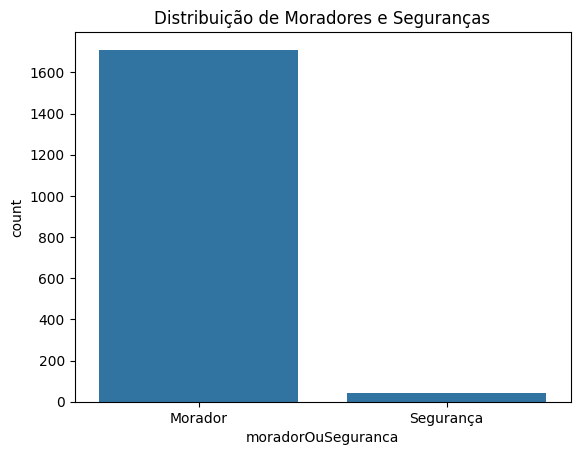

In [6]:
sns.countplot(x='moradorOuSeguranca', data=df_cleaned)
plt.title('Distribuição de Moradores e Seguranças')
plt.show()

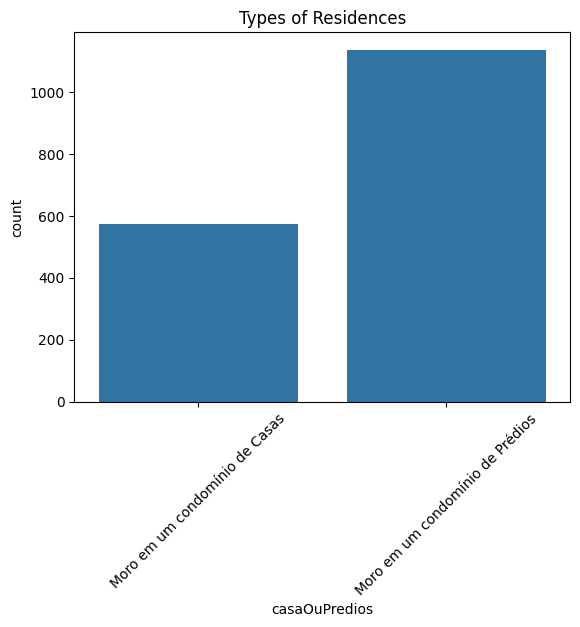

In [7]:
sns.countplot(x='casaOuPredios', data=df_cleaned)
plt.title('Types of Residences')
plt.xticks(rotation=45)
plt.show()

### A média de segurança é 3 (intervalo = 1-5)

Tanto nos condomínios de casas, quanto nos condomínios de prédios, tanto do ponto de vista de um morador, quanto do de um segurança, o valor médio é de 3. 

In [8]:
# Convert Timestamp to datetime (not necessary right now, but it is always recommended to this)
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'], format='%m/%d/%Y %H:%M:%S')

# Convert numerical ratings to integers
security_columns = ['1a5seguroCasas', '1a5segurancaCasas', '1a5seguroPredios', '1a5segurancaPredios', 'seguranca1a5trabalhaPredio', '1a5segurancaTrabalhaCasas']
for col in security_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce') # coerce prevents a error to be thrown if is a string ou a NaN value in some column
                                
print(df_cleaned.describe())

                           Timestamp  1a5seguroCasas  1a5segurancaCasas  \
count                           1751      574.000000         574.000000   
mean   2024-10-21 18:40:35.084523008        3.355401           3.191638   
min              2024-10-21 13:07:24        1.000000           1.000000   
25%              2024-10-21 14:01:53        3.000000           2.000000   
50%              2024-10-21 16:27:18        3.000000           3.000000   
75%              2024-10-21 21:18:39        4.000000           4.000000   
max              2024-10-22 13:06:09        5.000000           5.000000   
std                              NaN        1.276378           1.255299   

       1a5seguroPredios  1a5segurancaPredios  seguranca1a5trabalhaPredio  \
count       1136.000000          1136.000000                   12.000000   
mean           3.268486             3.066901                    4.000000   
min            1.000000             1.000000                    3.000000   
25%            3.000

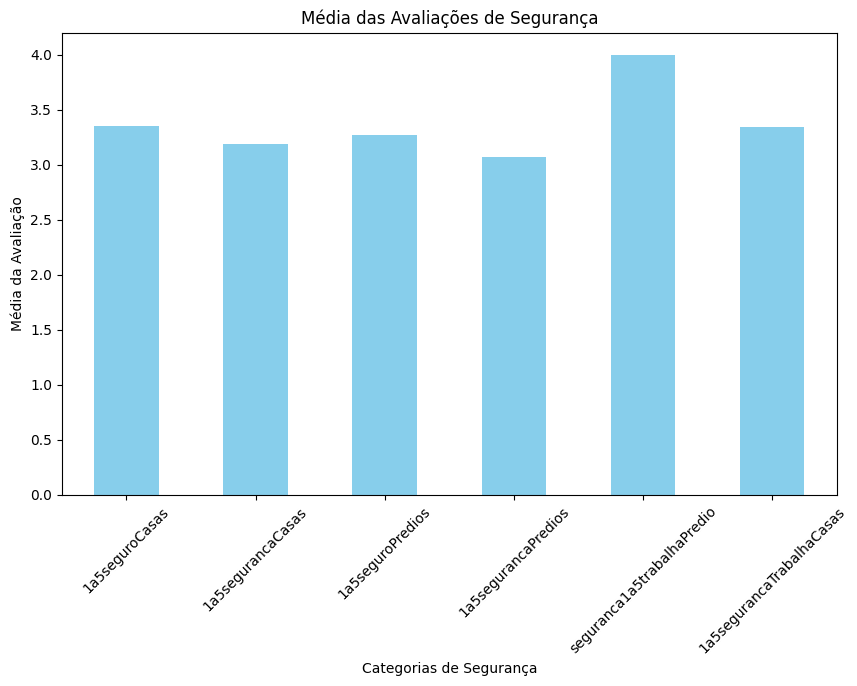

In [10]:
security_means = df_cleaned[security_columns].mean()

plt.figure(figsize=(10, 6))
security_means.plot(kind='bar', color='skyblue')
plt.title('Média das Avaliações de Segurança')
plt.ylabel('Média da Avaliação')
plt.xlabel('Categorias de Segurança')
plt.xticks(rotation=45)
plt.show()

In [24]:
# counting the answers for low medium high security
only_one_question_security = ["1a5seguroCasas", "1a5seguroPredios"]
df_cleaned.loc[df_cleaned[only_one_question_security].isin([5]).any(axis=1)].descricaoPredios.count()

np.int64(26)

## Hipótese: dado um condomínio de baixa segurança (1-2), há uma ocorrência maior de problemas dentro do condomínio?
### Vamos verificar!

In [26]:
only_one_question_security = ["1a5seguroCasas", "1a5seguroPredios"]

# Group security columns of condominium houses and condominium buildings by security level
low_security = df_cleaned.loc[df_cleaned[only_one_question_security].isin([1, 2]).any(axis=1)]
print("Quantidade de problemas em condomínios de baixa segurança de casas = ", low_security["problemasDescricaoCasas"].count())
print("Quantidade de problemas em condomínios de baixa segurança de prédios = ",low_security["descricaoPredios"].count())
print()

medium_security = df_cleaned.loc[df_cleaned[only_one_question_security].isin([3]).any(axis=1)]
print("Quantidade de problemas em condomínios de média segurança de casas = ",medium_security["problemasDescricaoCasas"].count())
print("Quantidade de problemas em condomínios de média segurança de prédios = ",medium_security["descricaoPredios"].count())
print()

high_security = df_cleaned.loc[df_cleaned[only_one_question_security].isin([4,5]).any(axis=1)]
print("Quantidade de problemas em condomínios de alta segurança de casas = ",high_security["problemasDescricaoCasas"].count())
print("Quantidade de problemas em condomínios de alta segurança de prédios = ",high_security["descricaoPredios"].count())

Quantidade de problemas em condomínios de baixa segurança de casas =  49
Quantidade de problemas em condomínios de baixa segurança de prédios =  147

Quantidade de problemas em condomínios de média segurança de casas =  54
Quantidade de problemas em condomínios de média segurança de prédios =  103

Quantidade de problemas em condomínios de alta segurança de casas =  33
Quantidade de problemas em condomínios de alta segurança de prédios =  84


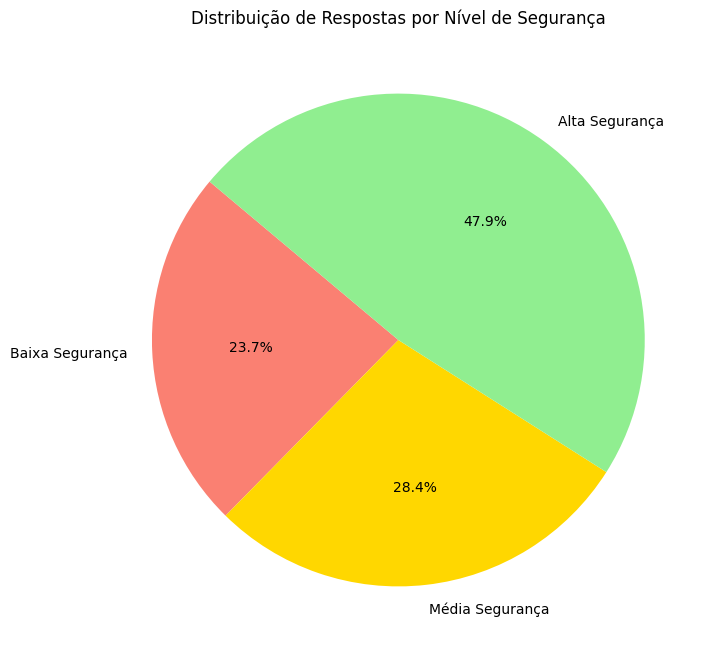

In [29]:
low_security_count = low_security[only_one_question_security].count().sum()
medium_security_count = medium_security[only_one_question_security].count().sum()
high_security_count = high_security[only_one_question_security].count().sum()

security_levels = ['Baixa Segurança', 'Média Segurança', 'Alta Segurança']
counts = [low_security_count, medium_security_count, high_security_count]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=security_levels, autopct='%1.1f%%', startangle=140, colors=['salmon', 'gold', 'lightgreen'])
plt.title('Distribuição de Respostas por Nível de Segurança')
plt.show()

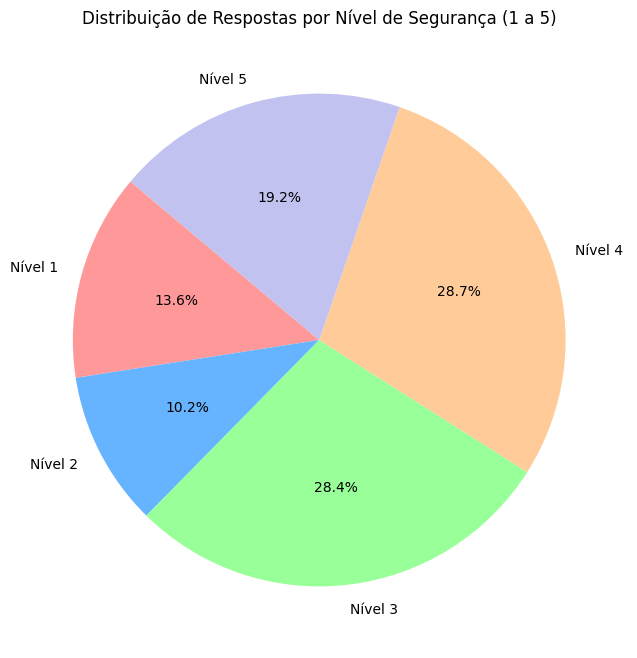

In [30]:
security_counts = [
    df_cleaned[only_one_question_security].isin([1]).sum().sum(),  # Segurança nível 1
    df_cleaned[only_one_question_security].isin([2]).sum().sum(),  # Segurança nível 2
    df_cleaned[only_one_question_security].isin([3]).sum().sum(),  # Segurança nível 3
    df_cleaned[only_one_question_security].isin([4]).sum().sum(),  # Segurança nível 4
    df_cleaned[only_one_question_security].isin([5]).sum().sum()   # Segurança nível 5
]

# Labels e cores para cada nível de segurança
security_levels = ['Nível 1', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Criação do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(security_counts, labels=security_levels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribuição de Respostas por Nível de Segurança (1 a 5)')
plt.show()


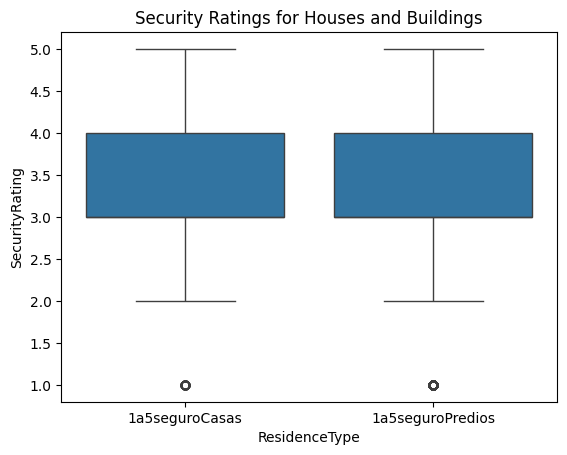

In [44]:
# Combine ratings into one DataFrame for comparison
ratings = pd.melt(df_cleaned, value_vars=['1a5seguroCasas', '1a5seguroPredios'], var_name='ResidenceType', value_name='SecurityRating')
sns.boxplot(x='ResidenceType', y='SecurityRating', data=ratings)
plt.title('Security Ratings for Houses and Buildings')
plt.show()

In [46]:
import nltk # importing Natural Language Toolkit, 
nltk.download('stopwords')

from nltk.corpus import stopwords
import re

# define stop words in portuguese
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/felipequentino/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


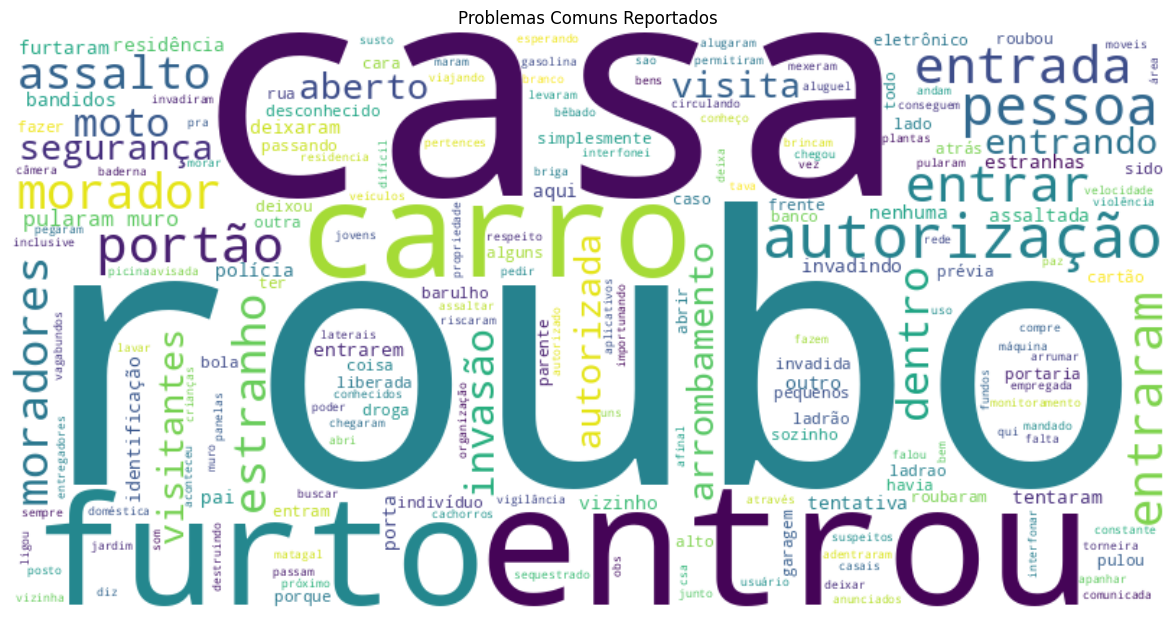

In [27]:
# Description column houses problems
problems = df_cleaned['problemasDescricaoCasas'].dropna()

# Combine all text in one string
text = ' '.join(problems).lower()

# Using regulars expressions to extract only words
words = re.findall(r'\b[a-zá-úà-ùâ-ûã-õç]+\b', text)

# removing stop words
filtered_words = [word for word in words if word not in stop_words]
palavras_vas = ['pessoas', 'condominio', 'condomínio', 'apartamento']
filtered_words = [word for word in filtered_words if word not in palavras_vas]


# join filtered words in 1 text
filtered_text = ' '.join(filtered_words)

# generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# plotting
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Problemas Comuns Reportados')
plt.show()

# saving wordcloud to a file
wordcloud.to_file("wordcloud/problemasCasas.png")

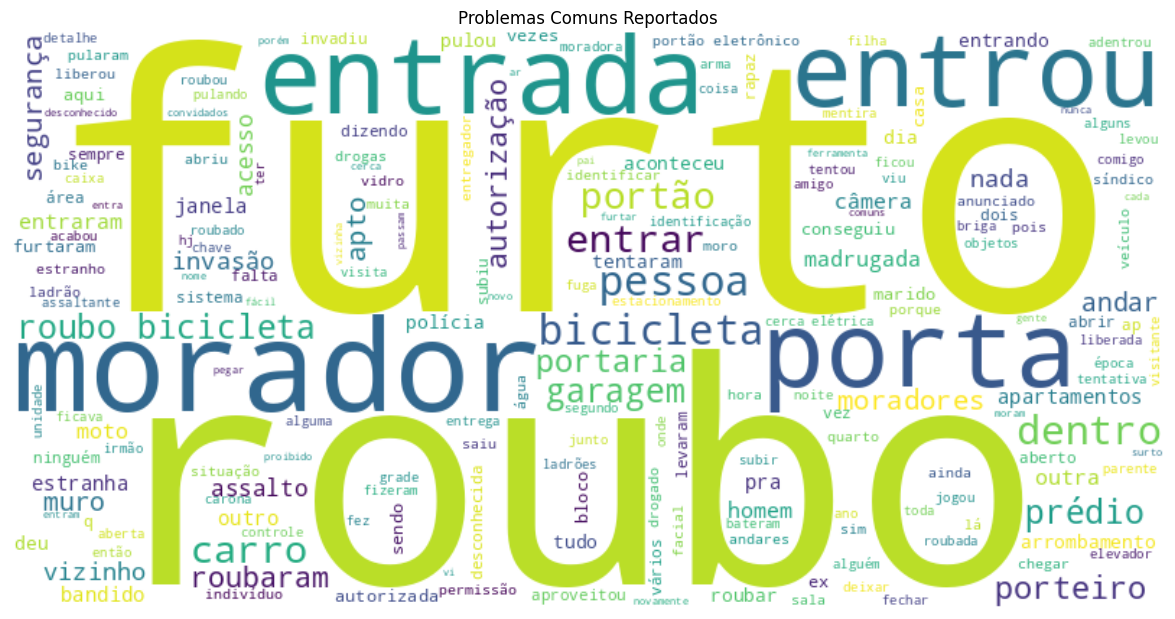

In [44]:
# same here, but with the column of buildings problems
problems = df_cleaned['descricaoPredios'].dropna()

text = ' '.join(problems).lower()

words = re.findall(r'\b[a-zá-úà-ùâ-ûã-õç]+\b', text)

filtered_words = [word for word in words if word not in stop_words]
palavras_vas = ['pessoas', 'condominio', 'condomínio', 'apartamento']
filtered_words = [word for word in filtered_words if word not in palavras_vas]

filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Problemas Comuns Reportados')
plt.show()

wordcloud.to_file("wordcloud/problemasPredios.png")

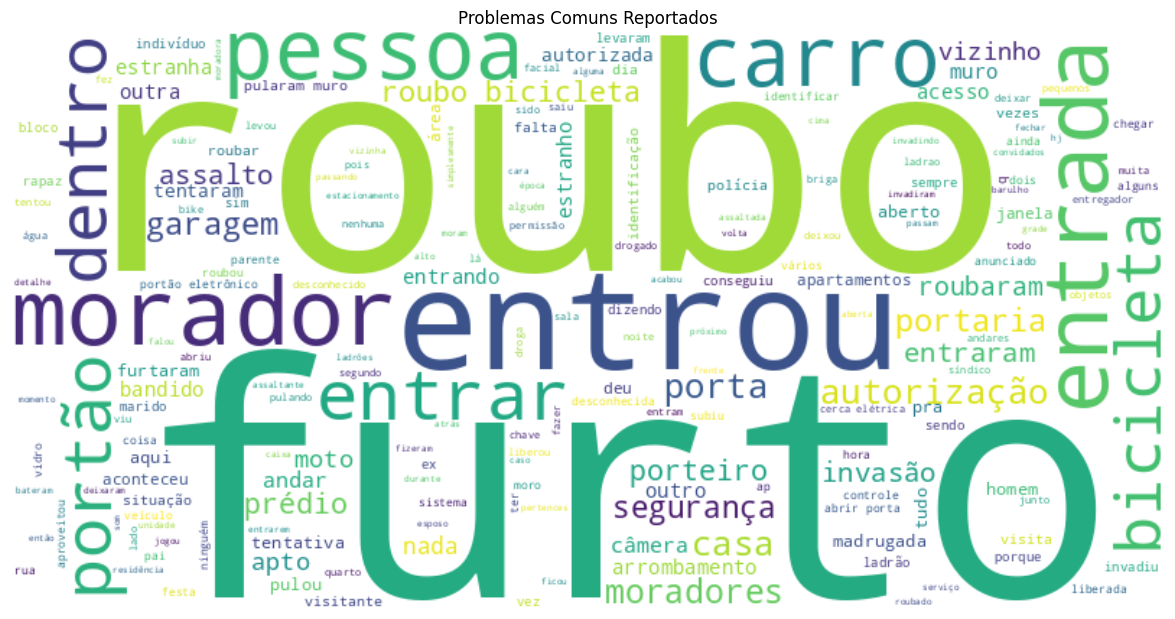

In [50]:
# all problems
problems = (
    df_cleaned['problemasDescricaoCasas'].fillna("")
            ._append(df_cleaned['descricaoPredios']).fillna("")
            ._append(df_cleaned['descricaoTrabalhaPredio']).fillna("")
            ._append(df_cleaned['descricaoProblemaTrabalhaCasa']).fillna("")
)
text = ' '.join(problems).lower()

words = re.findall(r'\b[a-zá-úà-ùâ-ûã-õç]+\b', text)

filtered_words = [word for word in words if word not in stop_words]
palavras_vas = ['pessoas', 'condominio', 'condomínio', 'apartamento']
filtered_words = [word for word in filtered_words if word not in palavras_vas]

filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Problemas Comuns Reportados')
plt.show()

wordcloud.to_file("wordcloud/todosProblemas.png")